In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [11]:
train_dir = "paddyData/train_images"
test_dir = "paddyData/test_images"

In [12]:
# For checking out that how many images are available in the train set we can use import OS
for types in os.listdir("paddyData/train_images/"):
    print(str(len(os.listdir("paddyData/train_images/"+ types)))+" "+ types+' images')

479 bacterial_leaf_blight images
380 bacterial_leaf_streak images
337 bacterial_panicle_blight images
1738 blast images
965 brown_spot images
1442 dead_heart images
620 downy_mildew images
1594 hispa images
1764 normal images
1088 tungro images


In [13]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True, validation_split=0.2)

train_generator = datagen_train.flow_from_directory(
    'paddyData/train_images',  
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Define validation data generator
validation_generator = datagen_train.flow_from_directory(
    'paddyData/train_images',  
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 8,022,922 (30.61 MB)

 Trainable params: 8,017,930 (30.59 MB)

 Non-trainable params: 4,992 (19.50 KB)

In [16]:
ephocs = 30
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=ephocs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 94s 696ms/step - accuracy: 0.2827 - loss: 2.1256 - val_accuracy: 0.2920 - val_loss: 2.4789
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.4531 - loss: 1.6655 - val_accuracy: 0.3793 - val_loss: 2.0129
Epoch 3/30


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 106s 814ms/step - accuracy: 0.5011 - loss: 1.4655 - val_accuracy: 0.4438 - val_loss: 1.8200
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.5469 - loss: 1.2160 - val_accuracy: 0.3103 - val_loss: 2.3813
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 109s 835ms/step - accuracy: 0.6007 - loss: 1.1832 - val_accuracy: 0.4302 - val_loss: 1.7848
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6406 - loss: 1.0227 - val_accuracy: 0.4483 - val_loss: 1.4864
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 64s 490ms/step - accuracy: 0.6836 - loss: 0.9654 - val_accuracy: 0.6035 - val_loss: 1.2157
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.5625 - loss: 1.2674 - val_accuracy: 0.6897 - val_loss: 1.1736
Epoch 9/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 125s 957ms/step - accuracy: 0.7017 - loss: 0.8868 - val_accuracy: 0.5654 - val_loss: 1.2985
Epoch 10/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.6392 - val_a

In [17]:
model.save('PaddyModel.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


'bacterial_leaf_streak'

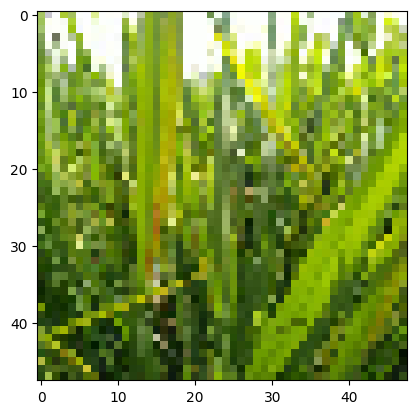

In [18]:
from tensorflow.keras.preprocessing import image

test_img_path = "bacLeafstre.jpg"
test_img = image.load_img(test_img_path, target_size=(img_size, img_size))
plt.imshow(test_img)
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = model.predict(test_img)
predicted_class = train_generator.class_indices
output = [key for key, value in predicted_class.items() if value == np.argmax(result)][0]
output

In [19]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=steps_per_epoch)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.9360 - loss: 0.1914
Training Accuracy: 93.68%
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8653 - loss: 0.4514
Validation Accuracy: 86.43%
